In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.express as px

In [22]:
# Load your CSV file into a DataFrame
df = pd.read_csv(r'D:\ECE143_EV_Adoption_Analysis\data\final_ev_analysis.csv')  # Replace 'your_file.csv' with the actual path to your CSV file



      Actual_Total_EV  Predicted_Total_EV
0                 891         1862.738660
1                2390         2513.778199
2                1586         1941.985821
3                 834         1862.738660
4                2564         2513.778199
...               ...                 ...
1422                0          981.478945
1423                0         -200.261637
1424                0          -82.307726
1425                0          -58.953798
1426                0          -56.431792

[1427 rows x 2 columns]
                    Feature   Coefficient
0   Median_Household_Income  8.787478e-03
1             County_Alpine -7.734203e+02
2             County_Amador -6.950583e+02
3              County_Butte -6.114848e+02
4          County_Calaveras -6.906614e+02
5             County_Colusa -6.332132e+02
6       County_Contra Costa -3.422137e+02
7          County_Del Norte -4.918033e+02
8          County_El Dorado -7.267498e+02
9             County_Fresno -4.931545e+02
10       

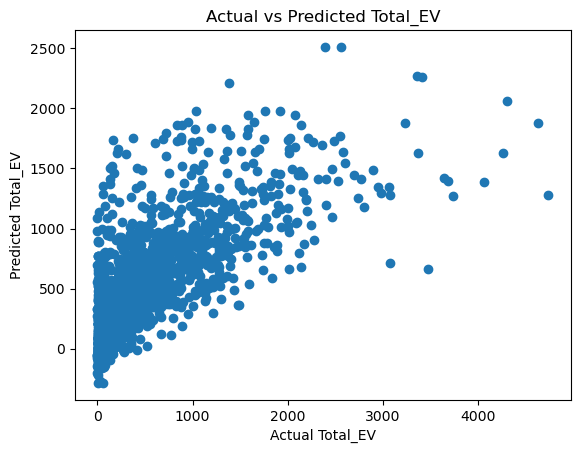

In [48]:
# Select features (X) and target variable (y)
features = df[['Median_Household_Income', 'BachOrHigher_perc', 'Latino_perc', 'White_perc', 'Asian_perc', 'Black_perc']]  # Replace with relevant feature columns
target = df['EV_perc']  # Replace with the target variable column (Total_EV or EV_perc)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

r_squared = model.score(X_test, y_test)
r_perc = r_squared*100
print(f'prediction%: {r_perc}%')

# Create a scatter plot with Plotly
fig = px.scatter(x=y_test, y=predictions, labels={'x': 'Actual Total_EV', 'y': 'Predicted Total_EV'},
                 title='Actual vs Predicted Total_EV (Random Forest)',
                 template='xgridoff')
fig.add_shape(type='line', x0=min(y_test), x1=max(y_test), y0=min(y_test), y1=max(y_test),
              line=dict(color='red', width=2, dash='dash'))
fig.show()

prediction%: 85.20709934655149%


Feature Importance:
                   Feature  Importance
1        BachOrHigher_perc    0.787165
0  Median_Household_Income    0.123676
4               Asian_perc    0.029634
2              Latino_perc    0.023435
3               White_perc    0.019792
5               Black_perc    0.016298


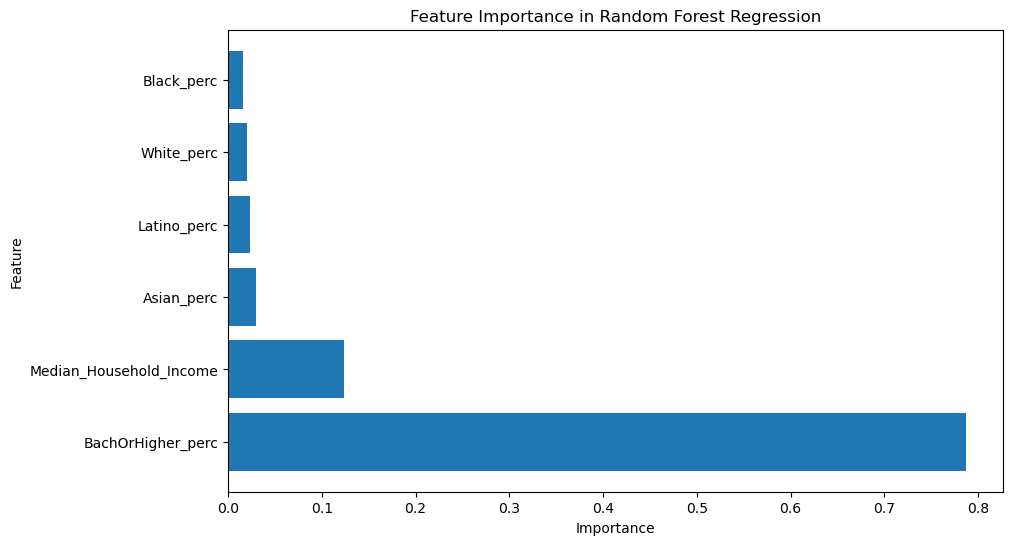

In [49]:
# Select features (X) and target variable (y)
features = df[['Median_Household_Income', 'BachOrHigher_perc', 'Latino_perc', 'White_perc', 'Asian_perc', 'Black_perc' ]]  # Replace with relevant feature columns
target = df['EV_perc']  # Replace with the target variable column (Total_EV or EV_perc)


# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

# Extract feature importance scores
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print("Feature Importance:")
print(feature_importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regression')
plt.show()

